In [3]:
# Basic building-block packages
import numpy as np

# For numerical solutions of ODEs
from scipy.integrate import solve_ivp

# Fancy-smansy maths
from scipy.stats import linregress
from numpy.linalg import norm

# For pretty-pretty graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

# Quality of life shit
from tqdm import tqdm
import pickle

# For FFT
import scipy.fftpack as fft

## Fast Fourier Transform

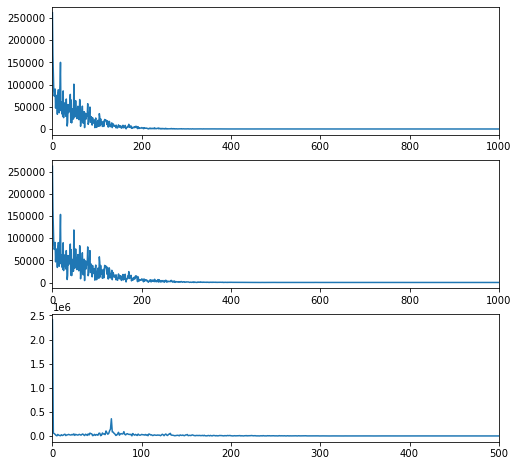

In [23]:
# sample spacing

Xf = fft.fft(x_sol)
Yf = fft.fft(y_sol)
Zf = fft.fft(z_sol)

samp = 1e5
tau = 1/samp # time interval

freq = fft.fftfreq(len(x_sol), tau)

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(3,1,wspace=0.1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[1,0])
axs3 = plt.subplot(grid[2,0])

axs1.set_xlim(left=0, right=1000, emit=True, auto=False)
axs2.set_xlim(left=0, right=1000, emit=True, auto=False)
axs3.set_xlim(left=0, right=500, emit=True, auto=False)

axs1.plot(freq[freq>=0], np.abs(Xf)[freq>=0])
axs2.plot(freq[freq>=0], np.abs(Yf)[freq>=0])
axs3.plot(freq[freq>=0], np.abs(Zf)[freq>=0])

plt.show()

## Poincare Section

Draw plots: 100%|██████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 544932.07it/s]


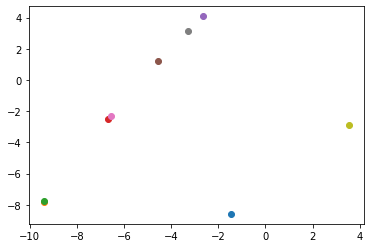

In [22]:
eps = 2.5e-3
tau = 1e-5

for i in tqdm(range(len(z_sol)),desc="Draw plots"):
    if -eps+30<z_sol[i]<eps+30:
        if (z_sol[i+1]-z_sol[i])/(2*tau)<0:
            plt.scatter(x_sol[i], y_sol[i])
                
plt.show()

# Bifurcation diagram

In [ ]:
handle = open("collected_data/high_freq.pkl", 'rb')
data=pickle.load(handle)
handle.close()

freq = np.round(np.linspace(5e2,7.5e3,200),decimals=3) # High freq
amp = np.round(np.linspace(5e-2,2,75),decimals=3)


def lorenz_system(x, y, z, r, s=10, b=8/3):
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z
    return x_dot, y_dot, z_dot


r = 1  # parameter step size
r = np.arange(40, 200, dr)  # parameter range
dt = 0.001  # time step
t = np.arange(0, 10, dt)  # time range

# initialize solution arrays
xs = np.empty(len(t) + 1)
ys = np.empty(len(t) + 1)
zs = np.empty(len(t) + 1)

# initial values x0,y0,z0 for the system
xs[0], ys[0], zs[0] = (1, 1, 1)


# Save the plot points coordinates and plot the with a single call to plt.plot
# instead of plotting them one at a time, as it's much more efficient
r_maxes = []
z_maxes = []
r_mins = []
z_mins = []


for R in tqdm(r):
    for i in range(len(t)):
        # approximate numerical solutions to system
        x_dot, y_dot, z_dot = lorenz_system(xs[i], ys[i], zs[i], R)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    # calculate and save the peak values of the z solution
    for i in range(1, len(zs) - 1):
        # save the local maxima
        if zs[i - 1] < zs[i] and zs[i] > zs[i + 1]:
            r_maxes.append(R)
            z_maxes.append(zs[i])
        # save the local minima
        elif zs[i - 1] > zs[i] and zs[i] < zs[i + 1]:
            r_mins.append(R)
            z_mins.append(zs[i])

    # "use final values from one run as initial conditions for the next to stay near the attractor"
    xs[0], ys[0], zs[0] = xs[i], ys[i], zs[i]


plt.scatter(r_maxes, z_maxes, color="black", s=0.5, alpha=0.2)
plt.scatter(r_mins, z_mins, color="red", s=0.5, alpha=0.2)

plt.xlim(0, 200)
plt.ylim(0, 400)
plt.show()